This section is dedicated to data cleaning and feature selection to train ML models and re-create the way Billy Beane and Paul DePodesta were analyzing in before 2002 season.

In [26]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

I will use one baseball datasets: **MLB Statistics 1962-2012**

In [4]:
# Upload dataset and show basic info
baseball_1962_2012 = pd.read_csv('baseball.csv')
baseball_1962_2012.info()  # get info about data types in columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [5]:
# Use mask to get data before 2002
# It's obvious that Beane and Podesta didn't have the data after that period
before_2002 = baseball_1962_2012.Year < 2002

# Apply mask and show info
real_data = baseball_1962_2012[before_2002]
real_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 902 entries, 330 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          902 non-null    object 
 1   League        902 non-null    object 
 2   Year          902 non-null    int64  
 3   RS            902 non-null    int64  
 4   RA            902 non-null    int64  
 5   W             902 non-null    int64  
 6   OBP           902 non-null    float64
 7   SLG           902 non-null    float64
 8   BA            902 non-null    float64
 9   Playoffs      902 non-null    int64  
 10  RankSeason    154 non-null    float64
 11  RankPlayoffs  154 non-null    float64
 12  G             902 non-null    int64  
 13  OOBP          90 non-null     float64
 14  OSLG          90 non-null     float64
dtypes: float64(7), int64(6), object(2)
memory usage: 112.8+ KB


In [6]:
# Get the 2002 stats to compare modeling results
year_2002 = baseball_1962_2012[baseball_1962_2012.Year == 2002]

# Drop columns I don't need
year_2002 = year_2002.drop(columns=['RankSeason', 'RankPlayoffs'])

# Save to csv
year_2002.to_csv('year_2002.csv', index=False)

In [7]:
# Drop RankSeason and RankPlayoffs 'cause it won't effect our models
# Apply it on data before 2002
real_data = real_data.drop(columns=['RankSeason', 'RankPlayoffs'])

In [8]:
# Let's look at OBP, SLG, OOBP and OSLG
# Beane and Podesta focused on these metrics 'cause they impact on the result

real_data[['OBP', 'SLG', 'OOBP', 'OSLG']].describe()

,OBP,SLG,OOBP,OSLG
count,902.000000,902.000000,90.000000,90.000000
mean,0.324961,0.390412,0.340478,0.432500
std,0.015391,0.033110,0.015416,0.025658
min,0.277000,0.301000,0.301000,0.377000
25%,0.314000,0.368000,0.329000,0.416000
50%,0.324000,0.388000,0.342000,0.432500
75%,0.335000,0.411750,0.350000,0.450750
max,0.373000,0.485000,0.384000,0.499000


Let's process NA values in OOBP and OSLG columns. Look at distributions and fill these values. In reality Beane and Podesta didn't have the opportunity to fill these values but I will do to experiment

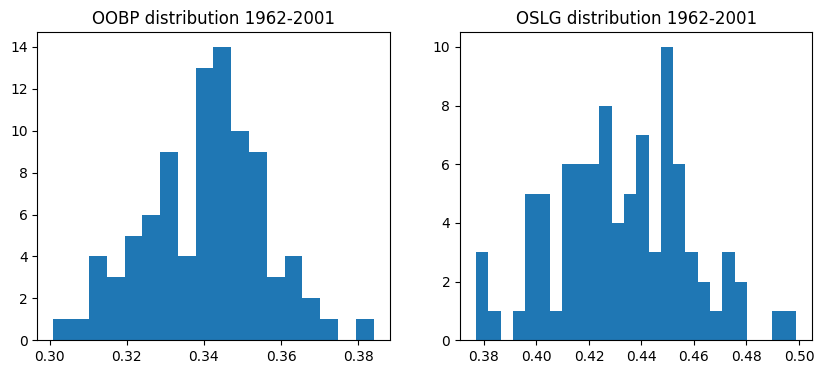

In [23]:
# Plot distributions
# Drop NaN
OOBP = real_data.OOBP.dropna()
OSLG = real_data.OSLG.dropna()

# Set bins of plot
oobp_bins = int(round(OOBP.unique().sum(), 0))
oslg_bins = int(round(OSLG.unique().sum(), 0))

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot & save image
ax[0].hist(OOBP, bins=oobp_bins)
ax[0].set_title('OOBP distribution 1962-2001')
ax[1].hist(OSLG, bins=oslg_bins)
ax[1].set_title('OSLG distribution 1962-2001')
plt.savefig('OOBP and OSLG distributions.png')
plt.show()

As you can see, data is normally distributed, but on the right and on the left have some outliers, that's why I suggest to fill NaNs by using trimmed mean to make it more precise

In [24]:
trimmed_mean_OOBP = stats.trim_mean(OOBP, 0.1)  # drop 10% from both sides
trimmed_mean_OSLG = stats.trim_mean(OSLG, 0.1)

# Replace values with calculated means
real_data.OOBP = real_data.OOBP.fillna(trimmed_mean_OOBP)
real_data.OSLG = real_data.OSLG.fillna(trimmed_mean_OSLG)

# Check the original dataframe
real_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 902 entries, 330 to 1231
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Team      902 non-null    object 
 1   League    902 non-null    object 
 2   Year      902 non-null    int64  
 3   RS        902 non-null    int64  
 4   RA        902 non-null    int64  
 5   W         902 non-null    int64  
 6   OBP       902 non-null    float64
 7   SLG       902 non-null    float64
 8   BA        902 non-null    float64
 9   Playoffs  902 non-null    int64  
 10  G         902 non-null    int64  
 11  OOBP      902 non-null    float64
 12  OSLG      902 non-null    float64
dtypes: float64(5), int64(6), object(2)
memory usage: 98.7+ KB


In [25]:
# Let's build correlation matrix to look at the connection between metrics
# Choose the metrics
corr_metrics = real_data[['W', 'OBP', 'SLG', 'BA', 'OOBP', 'OSLG']]
corr_metrics.head()

,W,OBP,SLG,BA,OOBP,OSLG
330,75,0.327,0.405,0.261,0.331,0.412
331,92,0.341,0.442,0.267,0.311,0.404
332,88,0.324,0.412,0.260,0.314,0.384
333,63,0.319,0.380,0.248,0.337,0.439
334,82,0.334,0.439,0.266,0.329,0.393


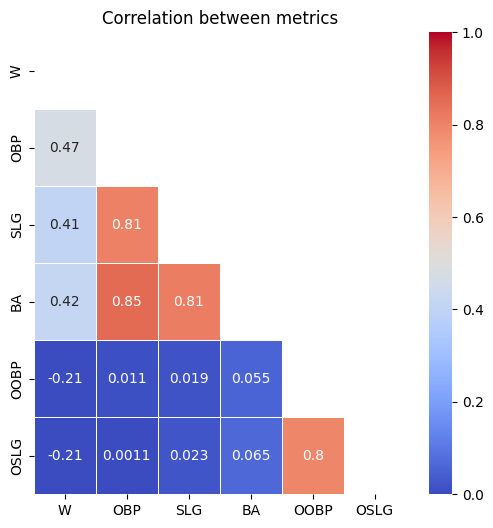

In [28]:
# Plot the correlation matrix to look at the correlation between them and wins
corr_matrix = corr_metrics.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot figure
plt.figure(figsize=(6, 6))
plt.title('Correlation between metrics')
sns.heatmap(corr_matrix,
            vmin=0.0,
            vmax=1.0,
            cmap='coolwarm',
            annot=True,
            linewidth=.5,
            mask=mask)
plt.savefig('Correlation between offensive metrics and wins.png')
plt.show()

You can see that correlation between OBP and BA are 5% higher. By the way, correlation between OSLG and OOBP, and SLG and OBP are pretty high (80 and 81%). And despite the fact that BA are tied with OBP stronger than with SLG, Beane and Podesta used *sabermetrics* rather than traditional metrics. The other scouts these years looked on BA as the key metrics to pick up the best player. So, Oakland Athletics had the huge advantage 'cause they noticed hidden pattern to sign cheap and valuable players.

In [29]:
# I processed the data and analyze connections between data
# Save processed data to use it further
real_data.to_csv('baseball_processed.csv', index=False)